## 6.4 Machine Learning Part I 


This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
Bonus: performance improvement after removing outliers¶

### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
path = '/Users/mdiaz/Desktop/NWWS data/Data'

In [7]:
df = pd.read_csv(os.path.join(path, 'Prepared', 'Clean NWWS.csv'))

### 2. Data Cleaning 

In [8]:
df.columns

Index(['state', 'id', 'county names', 'population_served', 'collection date',
       '15dy percent change', 'percentile', 'current percentile levels '],
      dtype='object')

In [9]:
df.head(20)

,state,id,county names,population_served,collection date,15dy percent change,percentile,current percentile levels
0,Hawaii,710,Kauai,10000,2022-12-27,5649.0,28,2
1,Maryland,547,Howard,270000,2022-12-27,-48.0,53,58
2,New York,426,Orange,6729,2022-12-27,-99.0,53,64
3,Oregon,932,Deschutes,92850,2022-12-27,-100.0,15,0
4,Oregon,956,Jackson,133708,2022-12-27,-70.0,20,0
5,Indiana,1293,St Joseph,130000,2022-12-27,-82.0,58,85
6,Colorado,1135,Teller,6379,2022-12-27,-61.0,41,42
7,Ohio,398,Lucas,372208,2022-12-27,-75.0,85,85
8,New Jersey,1385,Hudson,145000,2022-12-27,-79.0,66,92
9,New York City,545,Queens,728123,2022-12-27,-21.0,76,85


In [10]:
df.shape

(846, 8)

####  Missing Values

In [11]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

state                         0
id                            0
county names                  0
population_served             0
collection date               0
15dy percent change           0
percentile                    0
current percentile levels     0
dtype: int64

#### Duplicates Check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(846,)

#### Extreme Values Check

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='percentile', ylabel='Density'>

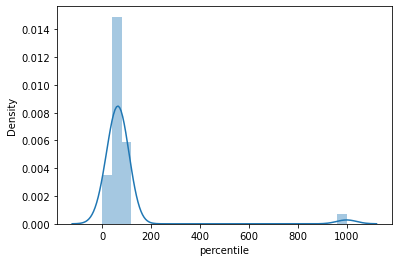

In [14]:
sns.distplot(df['percentile'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [15]:
df['percentile'].mean() # Check the mean

89.43735224586288

In [16]:
df['percentile'].median() # Check the median

67.0

In [17]:
df['percentile'].max() # Check the max

999

### 3. Data Prep for Regression Analysis

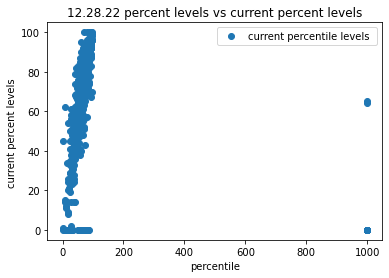

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'percentile', y='current percentile levels ',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('12.28.22 percent levels vs current percent levels')  
plt.xlabel('percentile')  
plt.ylabel('current percent levels ')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['percentile'].values.reshape(-1,1)
y = df['current percentile levels '].values.reshape(-1,1)

In [20]:
X

array([[ 28],
       [ 53],
       [ 53],
       [ 15],
       [ 20],
       [ 58],
       [ 41],
       [ 85],
       [ 66],
       [ 76],
       [ 82],
       [ 21],
       [999],
       [ 14],
       [ 40],
       [ 70],
       [ 59],
       [ 42],
       [ 80],
       [ 31],
       [ 95],
       [ 72],
       [ 41],
       [ 32],
       [ 74],
       [ 54],
       [ 41],
       [ 51],
       [ 88],
       [ 88],
       [ 90],
       [ 84],
       [ 43],
       [ 83],
       [ 76],
       [ 24],
       [999],
       [999],
       [ 43],
       [999],
       [ 50],
       [ 37],
       [ 50],
       [ 76],
       [ 57],
       [ 63],
       [ 52],
       [ 82],
       [ 62],
       [ 77],
       [ 56],
       [ 82],
       [ 19],
       [ 60],
       [ 64],
       [ 30],
       [ 21],
       [ 59],
       [ 81],
       [ 55],
       [ 62],
       [ 16],
       [ 54],
       [ 50],
       [ 64],
       [ 27],
       [ 56],
       [ 96],
       [ 45],
       [ 92],
       [ 81],
      

In [21]:
y

array([[  2],
       [ 58],
       [ 64],
       [  0],
       [  0],
       [ 85],
       [ 42],
       [ 85],
       [ 92],
       [ 85],
       [ 93],
       [  0],
       [  0],
       [ 14],
       [ 55],
       [ 70],
       [ 66],
       [ 52],
       [ 89],
       [ 31],
       [ 95],
       [ 72],
       [ 41],
       [ 35],
       [ 83],
       [ 63],
       [ 41],
       [ 51],
       [ 97],
       [ 88],
       [ 90],
       [ 84],
       [ 42],
       [ 83],
       [ 73],
       [  0],
       [  0],
       [  0],
       [ 43],
       [  0],
       [ 83],
       [ 43],
       [ 50],
       [ 76],
       [ 57],
       [ 55],
       [ 76],
       [ 82],
       [ 62],
       [ 77],
       [ 56],
       [ 82],
       [  0],
       [ 60],
       [ 84],
       [ 39],
       [  0],
       [ 59],
       [ 68],
       [ 73],
       [ 74],
       [ 34],
       [ 66],
       [ 66],
       [ 68],
       [ 58],
       [ 56],
       [ 96],
       [ 69],
       [ 83],
       [ 78],
      

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

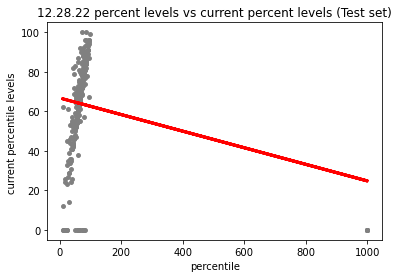

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('12.28.22 percent levels vs current percent levels (Test set)')
plot_test.xlabel('percentile')
plot_test.ylabel('current percentile levels ')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04193528]]
Mean squared error:  628.1241702118921
R2 score:  0.10018610725274768


In [29]:
y_predicted

array([[64.09006679],
       [63.79651981],
       [62.95781414],
       [63.96426094],
       [63.37716698],
       [65.30619001],
       [63.20942584],
       [64.13200208],
       [63.12555528],
       [64.00619623],
       [62.79007301],
       [62.91587886],
       [65.55780171],
       [63.20942584],
       [65.51586642],
       [64.46748434],
       [63.83845509],
       [63.96426094],
       [64.88683718],
       [63.54490811],
       [65.72554284],
       [66.01908982],
       [62.8320083 ],
       [64.34167849],
       [62.74813773],
       [63.08361999],
       [63.67071396],
       [63.41910226],
       [65.47393114],
       [62.74813773],
       [63.33523169],
       [63.12555528],
       [63.71264924],
       [64.59329019],
       [64.92877246],
       [64.38361378],
       [65.76747812],
       [63.37716698],
       [63.33523169],
       [64.04813151],
       [65.51586642],
       [64.25780793],
       [64.59329019],
       [64.25780793],
       [63.79651981],
       [63

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,62,64.090067
1,70,63.796520
2,78,62.957814
3,66,63.964261
4,80,63.377167
5,44,65.306190
6,84,63.209426
7,62,64.132002
8,78,63.125555
9,65,64.006196


##### Compare how the regression fits the training set

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04193528]]
Mean squared error:  610.9094320803921
R2 score:  0.06323065239553038


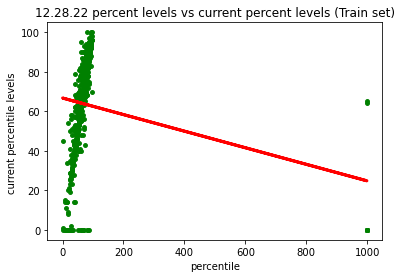

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('12.28.22 percent levels vs current percent levels (Train set)')
plot_test.xlabel('percentile')
plot_test.ylabel('current percentile levels ')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [35]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['percentile'] <=100] 

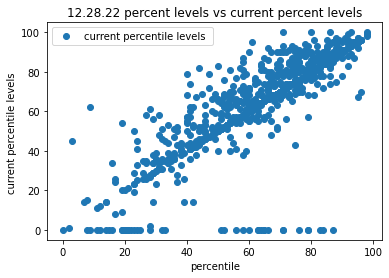

In [36]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'percentile', y='current percentile levels ', style='o')  
plt.title('12.28.22 percent levels vs current percent levels')  
plt.xlabel('percentile')  
plt.ylabel('current percentile levels ')  
plt.show()

In [37]:
# Reshape again.

X_2 = df_test['percentile'].values.reshape(-1,1)
y_2 = df_test['current percentile levels '].values.reshape(-1,1)

In [38]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [39]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [40]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [41]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92537302]]
Mean squared error:  198.32077202721865
R2 score:  0.6697719415516183


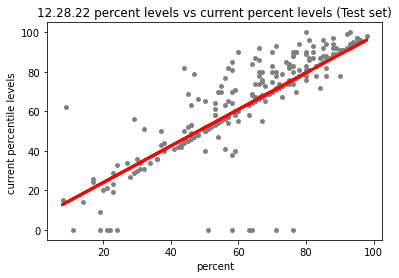

In [43]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('12.28.22 percent levels vs current percent levels (Test set)')
plot_test.xlabel('percent')
plot_test.ylabel('current percentile levels ')
plot_test.show()

In [44]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,100,91.498919
1,95,93.349665
2,92,66.513848
3,82,74.842205
4,67,72.991459
5,78,82.245189
6,80,66.513848
7,0,25.797435
8,43,45.230268
9,78,79.469070


### The predictive model performed as expected. An influx of Sars-Cov-2 cases were expected to increase due to the holidays, when everyone leans towards congregate settings. There was however an impact on data bias, since these results only show values for the wastewater sheds that provided samples to test for the period of 12.28.22. For the sites with 0 value - the predicted model gave them a 25 % increase, which isn't always accurate. In addition, with the influx of rain and flooding, some sample in certain regions disproportioned the actual results. 

In [46]:
plot_test.savefig('plot_test.png')

<Figure size 432x288 with 0 Axes>